In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [33]:
df_medical_insurance = pd.read_csv("./dados/Medical-Insurance.csv")
df_walmart_sales = pd.read_csv("./dados/Walmart_Sales.csv")

# Medical Insurance

In [34]:
df_medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2772 non-null   object 
 1   Sex       2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2772 non-null   object 
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [58]:
df_medical_insurance = df_medical_insurance[~df_medical_insurance.isin(['?']).any(axis=1)]
sex_map = {2: 'female', 1: 'male'}
region_map = {1: "NW", 2: "NE", 3: "SW", 4: "SE"}
df_medical_insurance["Sex Category"] = df_medical_insurance["Sex"].map(sex_map)
df_medical_insurance["Region Category"] = df_medical_insurance["Region"].map(region_map)
df_medical_insurance['Sex Category'] = df_medical_insurance['Sex Category'].astype('category')
df_medical_insurance['Region Category'] = df_medical_insurance['Region Category'].astype('category')
df_medical_insurance = df_medical_insurance.astype({'Age': int, "Sex":int, "BMI": float, "Children": int, "Smoker": int, "Region": int, "Charges": float})
scaler = MinMaxScaler()
scaler.fit(df_medical_insurance.drop(columns= ["Sex Category", "Region Category"]))
medical_insurance_norm = scaler.fit_transform(df_medical_insurance.drop(columns= ["Sex Category", "Region Category"]))
df_medical_insurance_norm = pd.DataFrame(medical_insurance_norm, columns=df_medical_insurance.drop(columns= ["Sex Category", "Region Category"]).columns)

               Age          Sex          BMI     Children       Smoker  \
count  2761.000000  2761.000000  2761.000000  2761.000000  2761.000000   
mean      0.459104     0.507063     0.396980     0.220065     0.203912   
std       0.306382     0.500041     0.165001     0.242905     0.402977   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.173913     0.000000     0.276029     0.000000     0.000000   
50%       0.456522     1.000000     0.391041     0.200000     0.000000   
75%       0.717391     1.000000     0.506860     0.400000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Region      Charges  
count  2761.000000  2761.000000  
mean      0.520584     0.193985  
std       0.376852     0.194079  
min       0.000000     0.000000  
25%       0.333333     0.057405  
50%       0.666667     0.131783  
75%       1.000000     0.246708  
max       1.000000     1.000000  


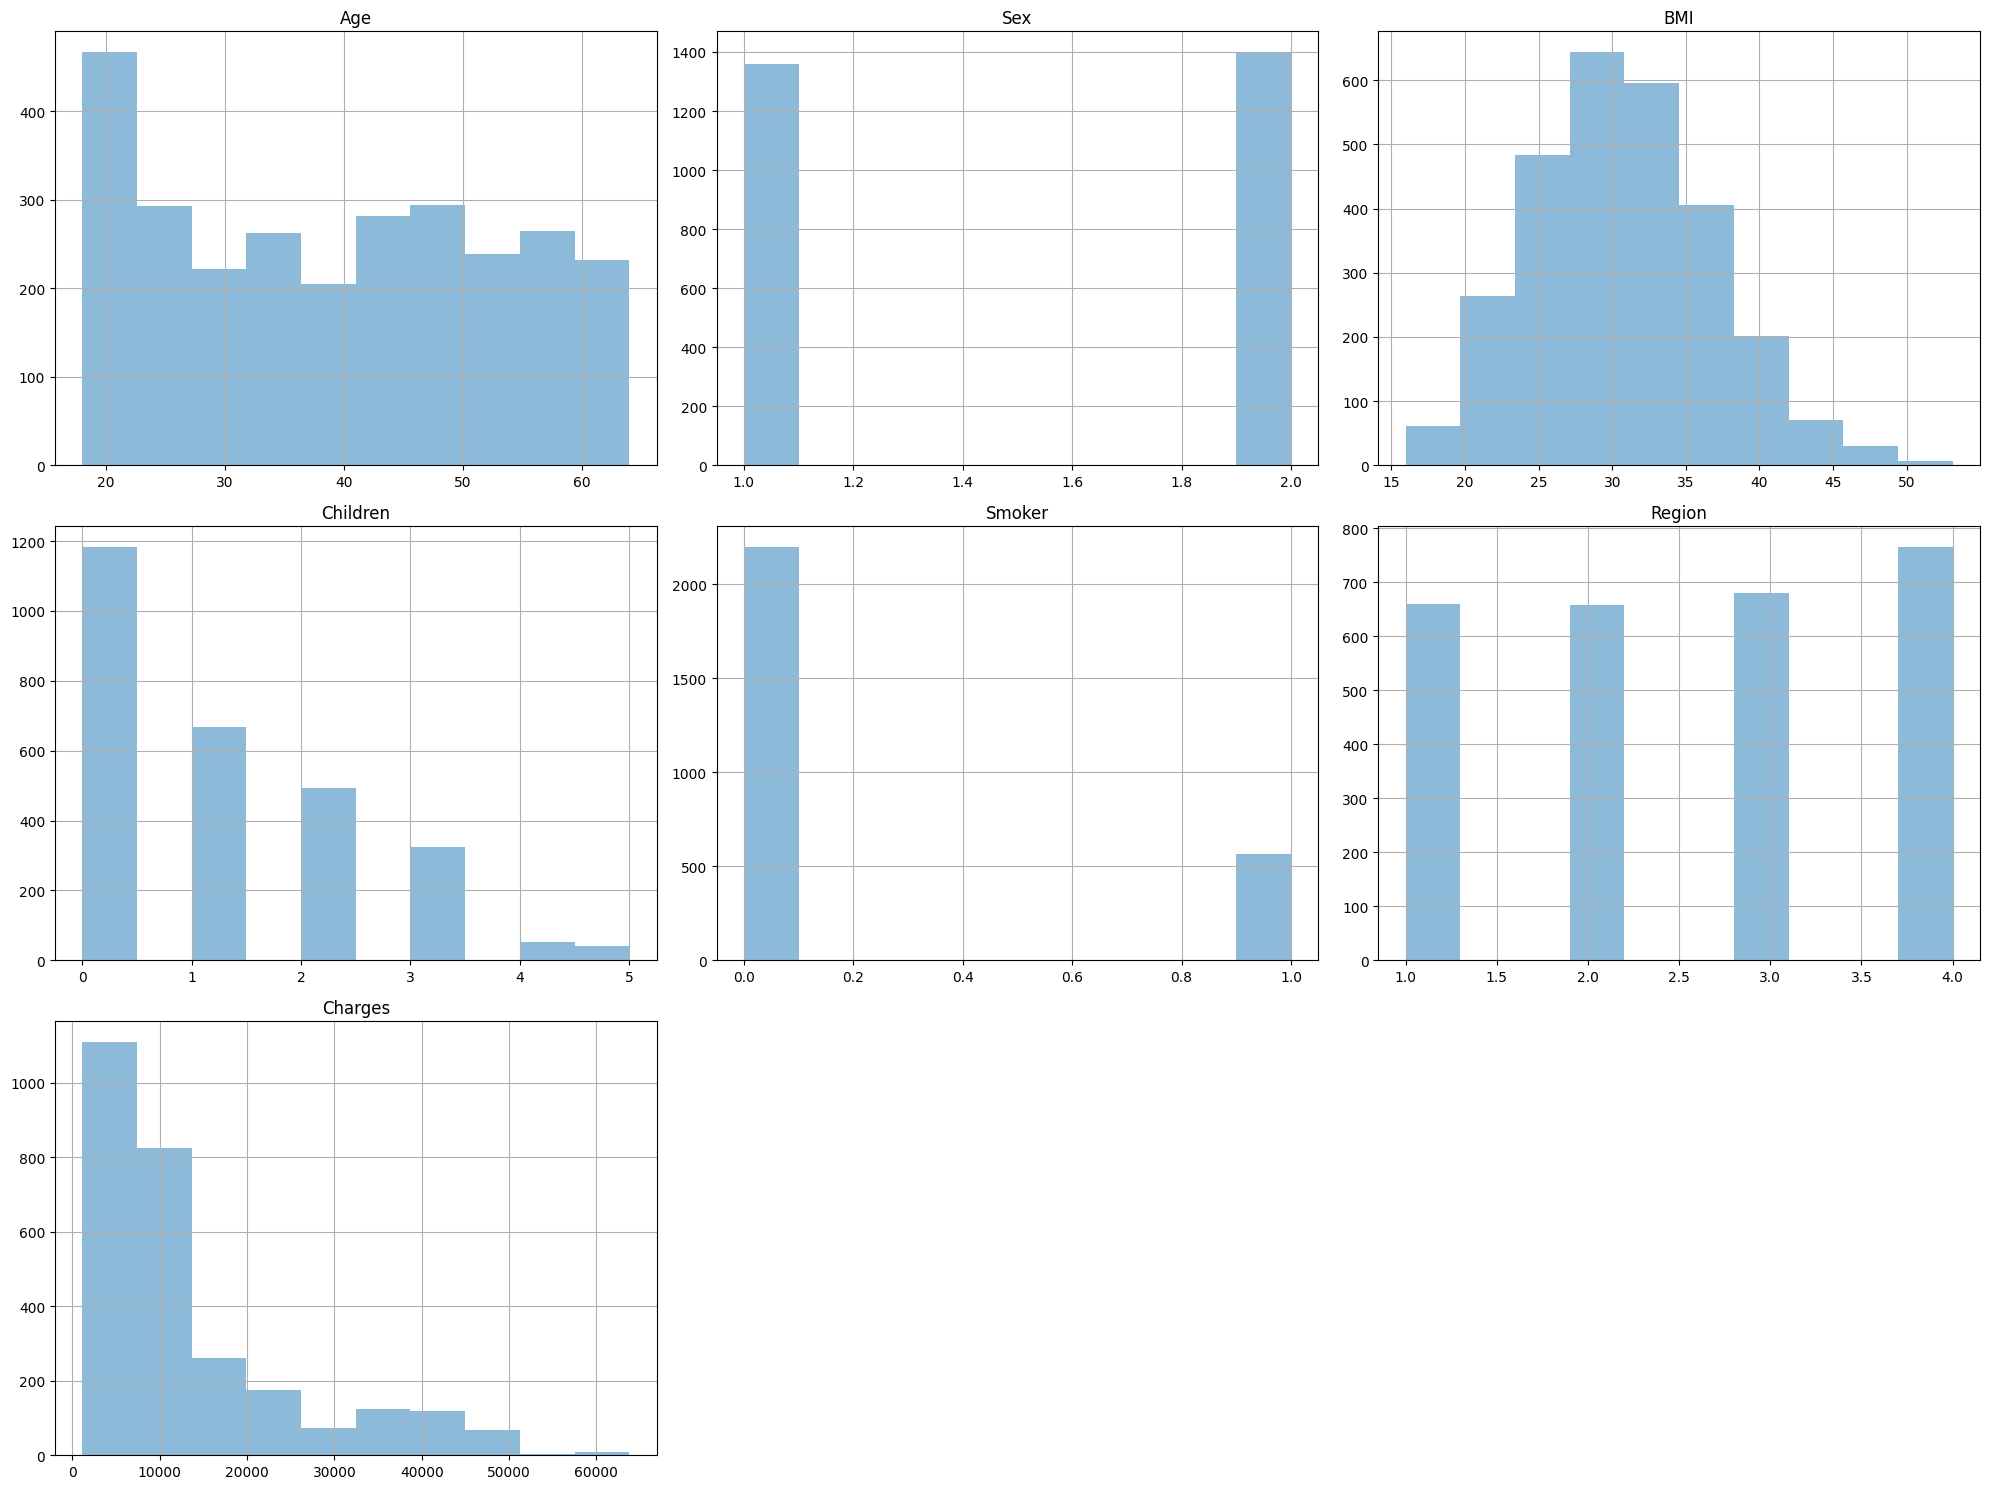

<Axes: >

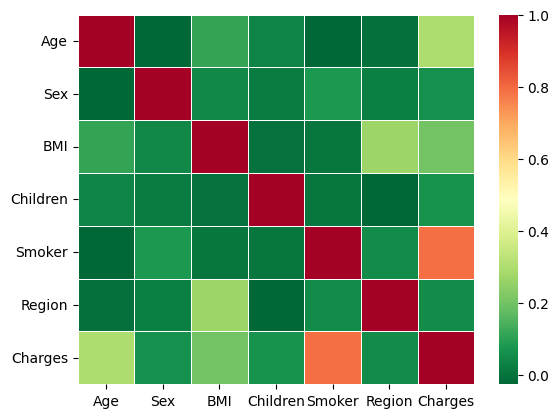

In [66]:
print(df_medical_insurance_norm.describe())
df_medical_insurance.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()
corr_df_medical_insurance_norm = df_medical_insurance_norm.corr()
sns.heatmap(corr_df_medical_insurance_norm, cmap='RdYlGn_r', linewidths=0.5)

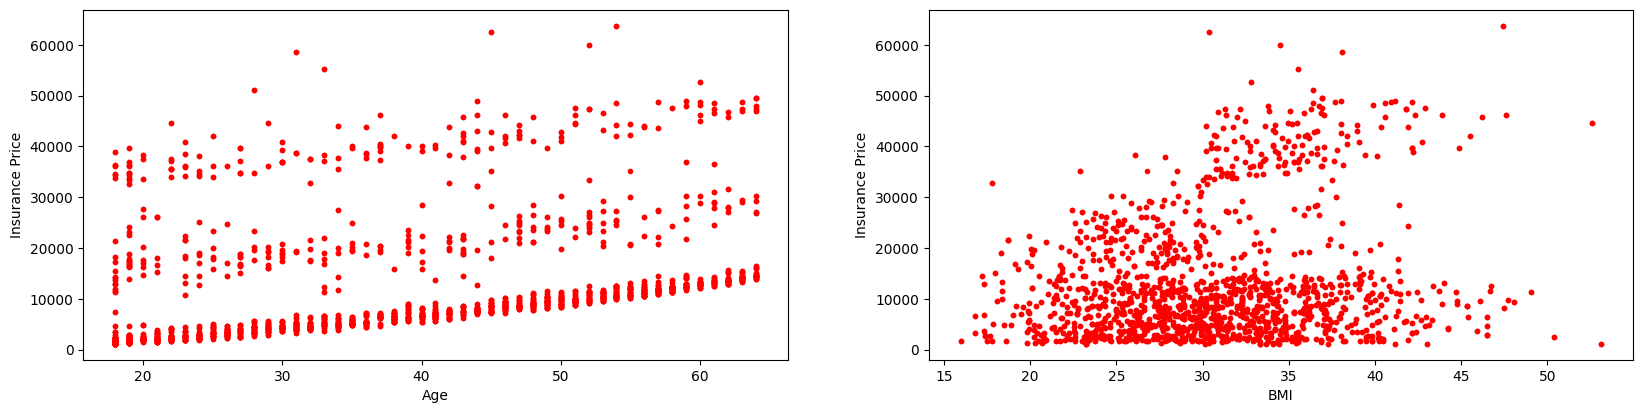

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter( 'Age', 'Charges', data=df_medical_insurance, marker='.', color='red', linewidth=1)
plt.xlabel("Age")
plt.ylabel("Insurance Price")

plt.subplot(2, 2, 2)
plt.scatter( 'BMI', 'Charges', data=df_medical_insurance, marker='.', color='red', linewidth=1)
plt.xlabel("BMI")
plt.ylabel("Insurance Price")



plt.show()

MSE: 40837351.33367272
MAE: 4373.879676950937


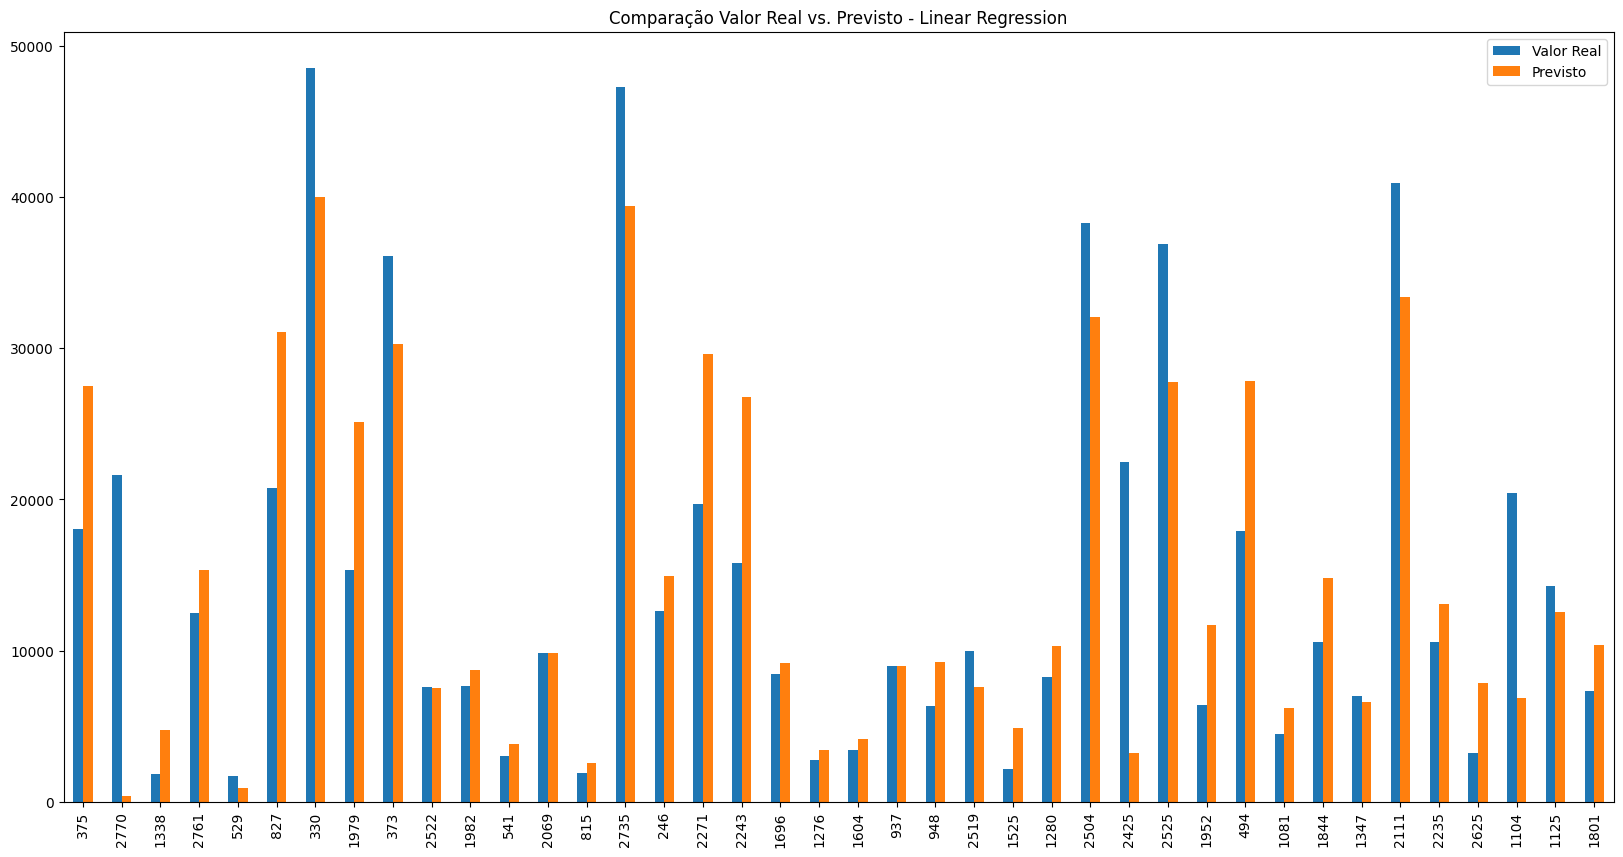

MSE: 26799371.99026726
MAE: 3416.120711068816
MSE: 22572460.952629577
MAE: 2872.071200695896
MSE: 18818115.40007405
MAE: 2500.872427221268


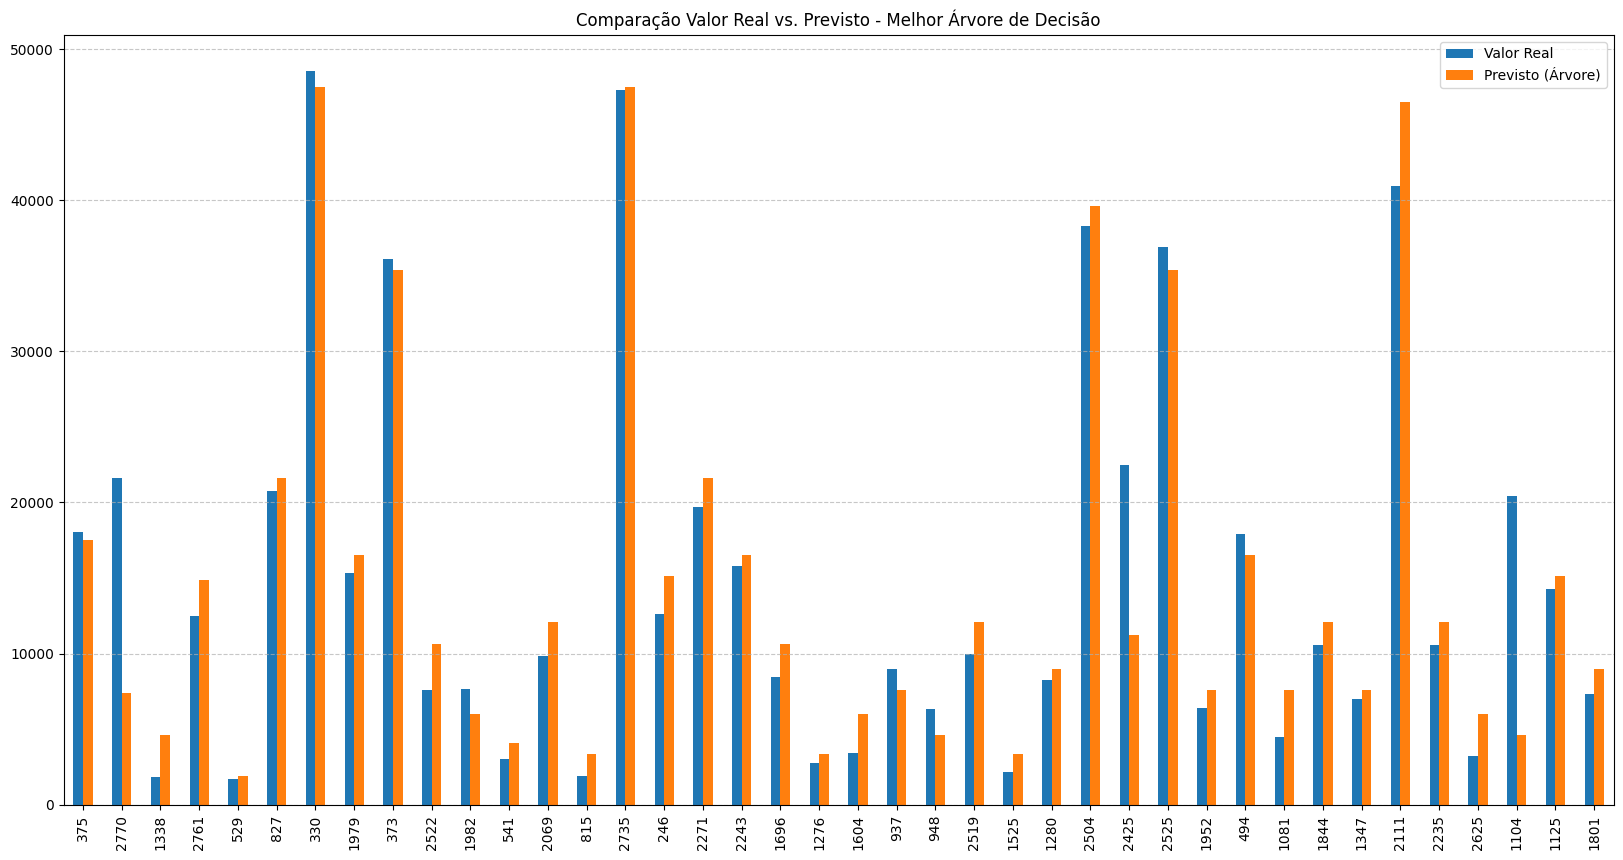

MSE: 30506105.127703942
MAE: 3449.3091391564535
MSE: 26985218.99549959
MAE: 2987.842487031122
MSE: 26204497.476339042
MAE: 2653.2650479517492
MSE: 23267571.565732636
MAE: 2230.1758690156817


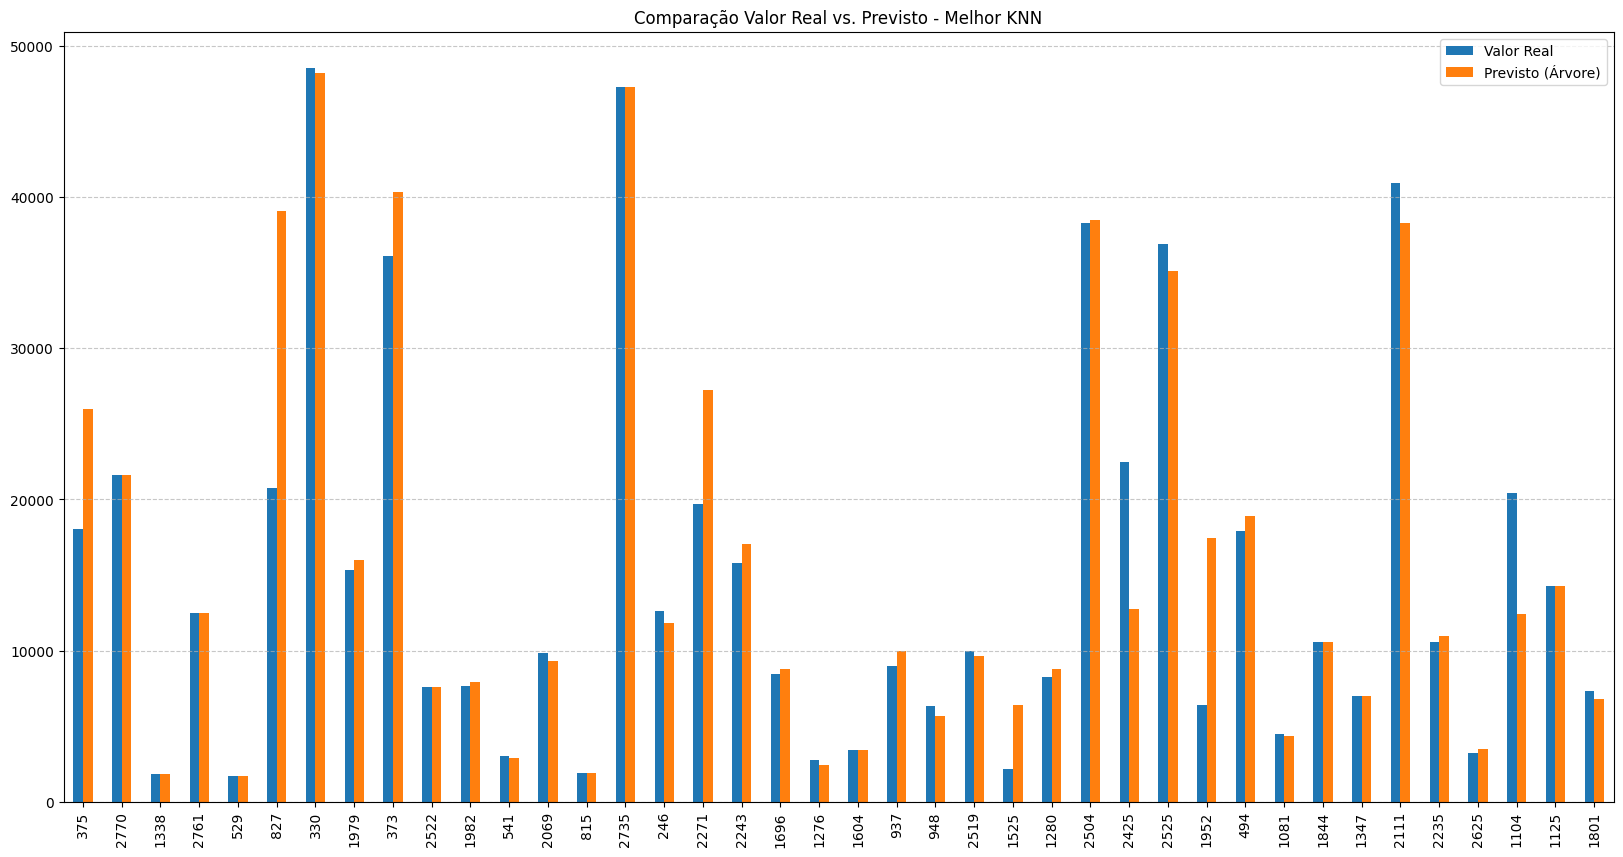

In [120]:
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(df_medical_insurance_norm.drop('Charges', axis=1), df_medical_insurance['Charges'], test_size=0.3, random_state=42)
linear_model_medical_insurance = LinearRegression()
linear_model_medical_insurance.fit(dados_treino, rotulos_treino)
linear_model_medical_insurance_predict = linear_model_medical_insurance.predict(dados_teste)
print("MSE:", MSE(rotulos_teste, linear_model_medical_insurance_predict))
print("MAE:", MAE(rotulos_teste, linear_model_medical_insurance_predict))
real_predict_df = pd.DataFrame({'Valor Real': rotulos_teste, 'Previsto': linear_model_medical_insurance_predict})
real_predict_df.iloc[0:40,:].plot(kind='bar',figsize=(20,10))
plt.title('Comparação Valor Real vs. Previsto - Linear Regression')
plt.show()

criterio = ["squared_error",'absolute_error']
splitter = ["best", "random"]
max_depth = [2,3, 5]
melhor_mse = np.inf
for c in criterio:
  for s in splitter:
    for m in max_depth:
      tree = DecisionTreeRegressor(criterion=c, splitter=s, max_depth=m)
      tree.fit(dados_treino, rotulos_treino)
      prev_train = tree.predict(dados_teste)
      mse_train = MSE(rotulos_teste, prev_train)
      mae_train = MAE(rotulos_teste, prev_train)
      if mse_train < melhor_mse:
        melhor_mse = mse_train
        melhor_modelo = tree
        print("MSE:", melhor_mse)
        print("MAE:", mae_train)

tree_predict_teste = melhor_modelo.predict(dados_teste)
tree_real_predict_df = pd.DataFrame({
    'Valor Real': rotulos_teste,
    'Previsto (Árvore)': tree_predict_teste
})
tree_real_predict_df.iloc[0:40,:].plot(kind='bar', figsize=(20, 10))
plt.title('Comparação Valor Real vs. Previsto - Melhor Árvore de Decisão')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade para facilitar a leitura
plt.show()

k_values = [10, 5, 3, 2]
metric = ['minkowski', 'euclidean']
melhor_mse = np.inf
for k in k_values:
  for m in metric:
    knn = KNeighborsRegressor(n_neighbors=k, metric=m)
    knn.fit(dados_treino, rotulos_treino)
    prev_train = knn.predict(dados_teste)
    mse_train = MSE(rotulos_teste, prev_train)
    mae_train = MAE(rotulos_teste, prev_train)
    if mse_train < melhor_mse:
      melhor_mse = mse_train
      melhor_modelo = knn
      print("MSE:", melhor_mse)
      print("MAE:", mae_train)
knn_predict_teste = melhor_modelo.predict(dados_teste)
knn_real_predict_df = pd.DataFrame({
    'Valor Real': rotulos_teste,
    'Previsto (Árvore)': knn_predict_teste
})
knn_real_predict_df.iloc[0:40,:].plot(kind='bar', figsize=(20, 10))
plt.title('Comparação Valor Real vs. Previsto - Melhor KNN')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade para facilitar a leitura
plt.show()

# Walmart Sale

In [110]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [115]:
df_walmart_sales['Date'] = pd.to_datetime(df_walmart_sales['Date'],format='mixed')
df_walmart_sales.info()
scaler = MinMaxScaler()
scaler.fit(df_walmart_sales.drop(columns=["Date"]))
walmart_sales_norm = scaler.fit_transform(df_walmart_sales.drop(columns= ["Date"]))
df_walmart_sales_norm = pd.DataFrame(walmart_sales_norm, columns=df_walmart_sales.drop(columns= ["Date"]).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000   6435.000000   6435.000000  6435.000000  6435.000000   
mean      0.500000      0.231934      0.069930     0.613736     0.444192   
std       0.295186      0.156391      0.255049     0.180479     0.229970   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       0.250000      0.095149      0.000000     0.484540     0.230962   
50%       0.500000      0.208042      0.000000     0.633366     0.487475   
75%       0.750000      0.335349      0.000000     0.753425     0.632766   
max       1.000000      1.000000      1.000000     1.000000     1.000000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean      0.449886      0.394877  
std       0.389020      0.179786  
min       0.000000      0.000000  
25%       0.056055      0.288672  
50%       0.558992      0.382883  
75%       0.856779      0.454572  
max       1.000000      1.000000  


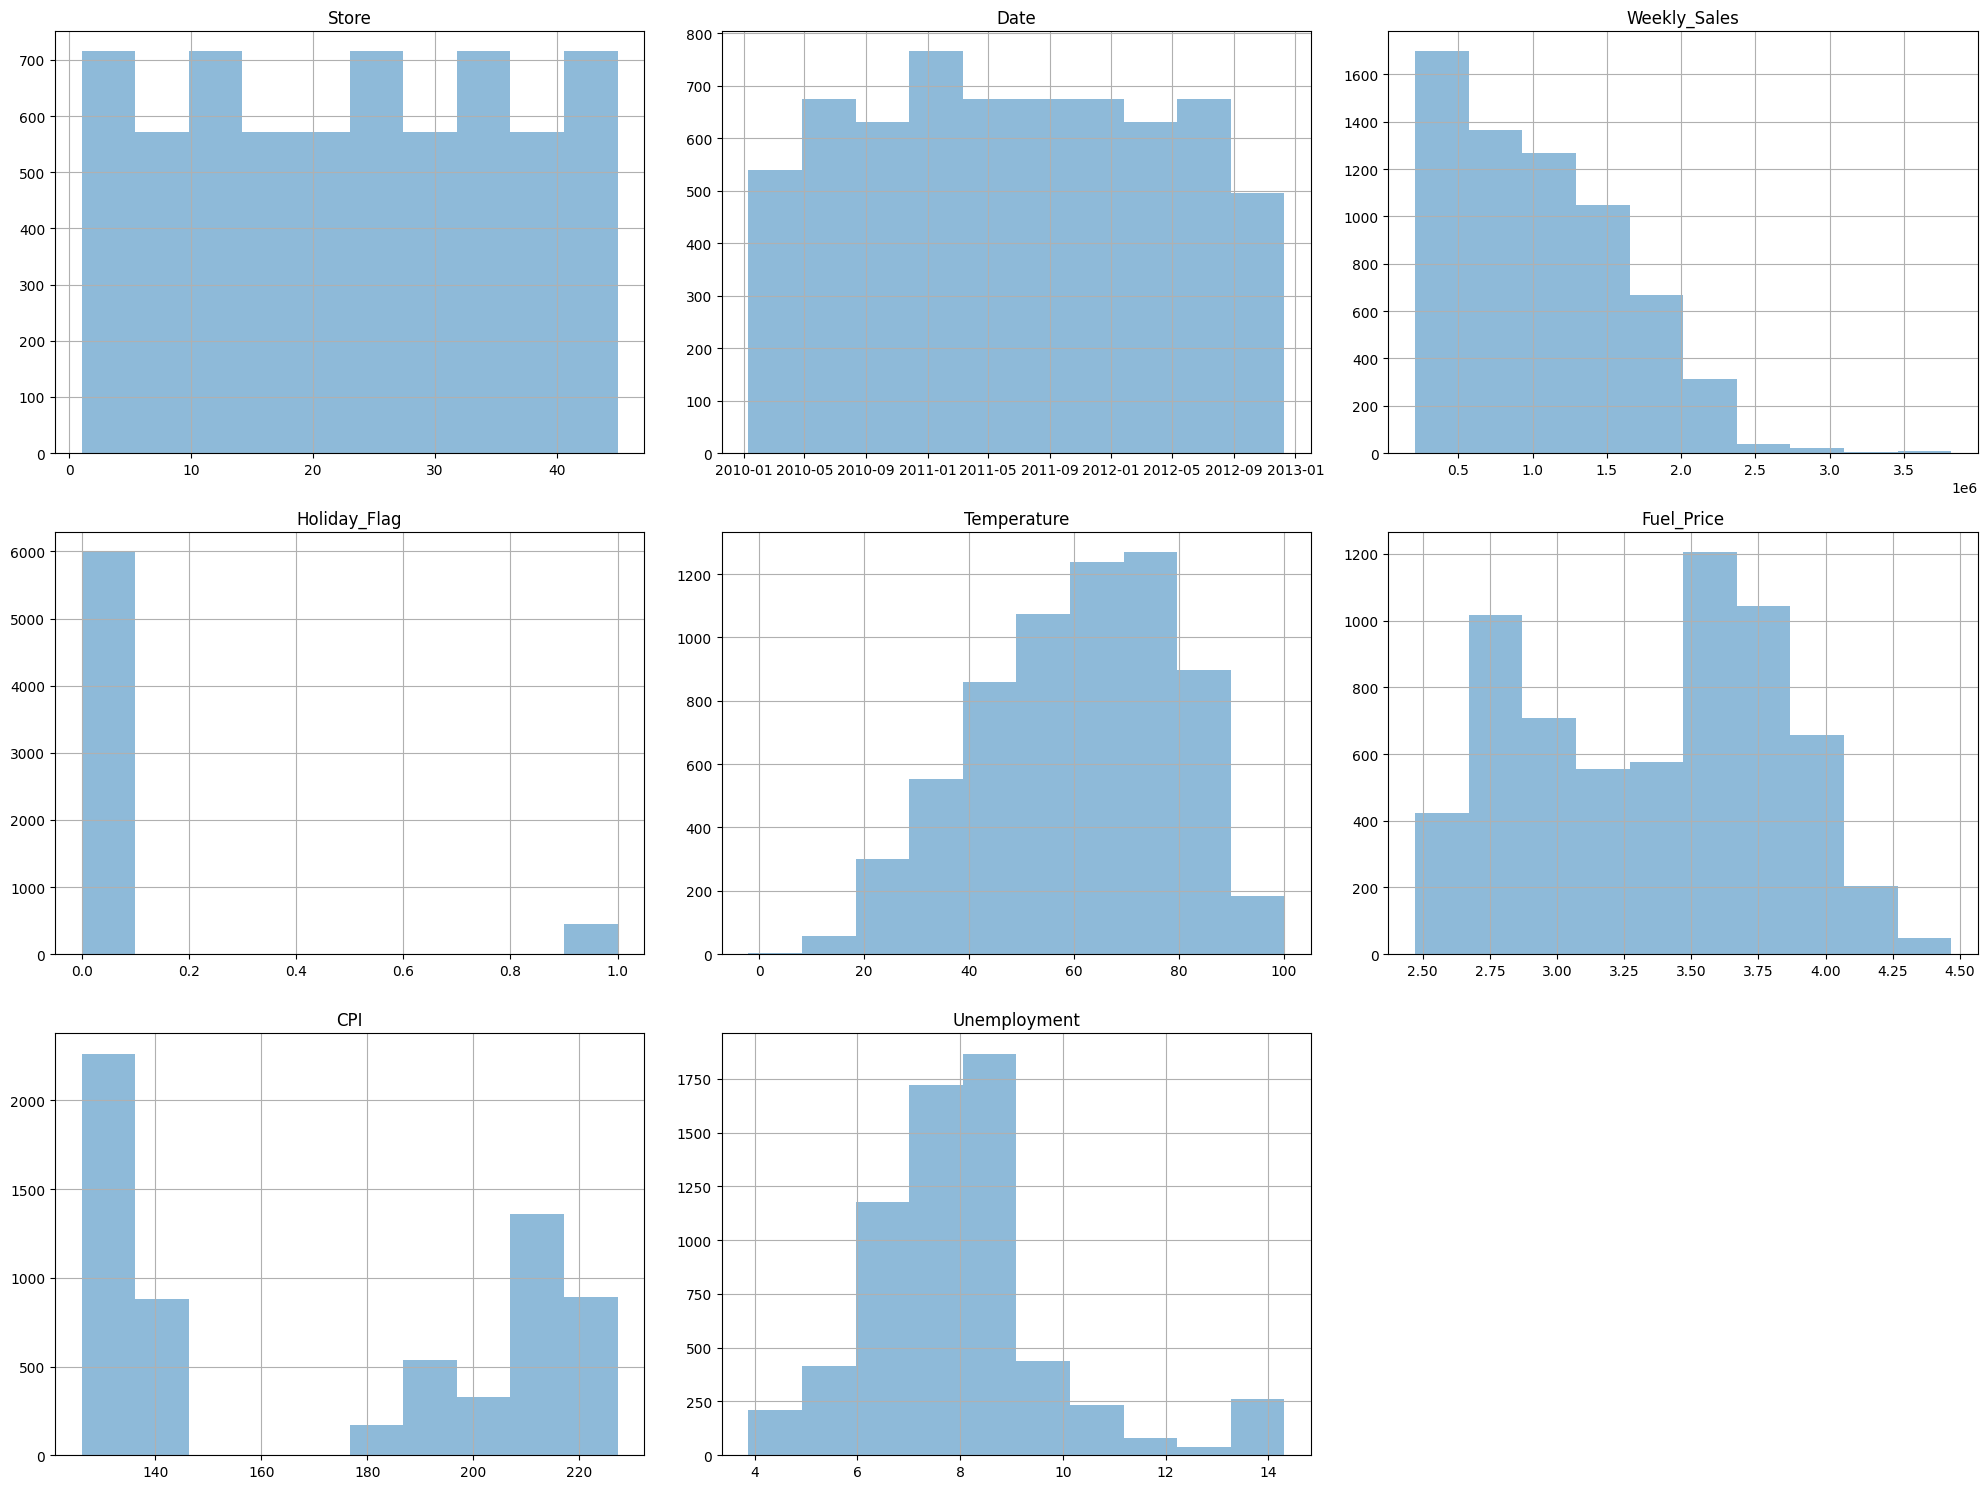

<Axes: >

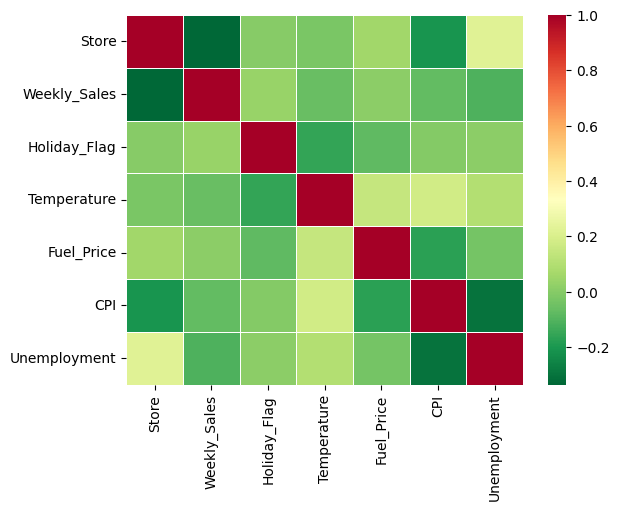

In [116]:
print(df_walmart_sales_norm.describe())
df_walmart_sales.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()
corr_df_walmart_sales_norm = df_walmart_sales_norm.corr()
sns.heatmap(corr_df_walmart_sales_norm, cmap='RdYlGn_r', linewidths=0.5)

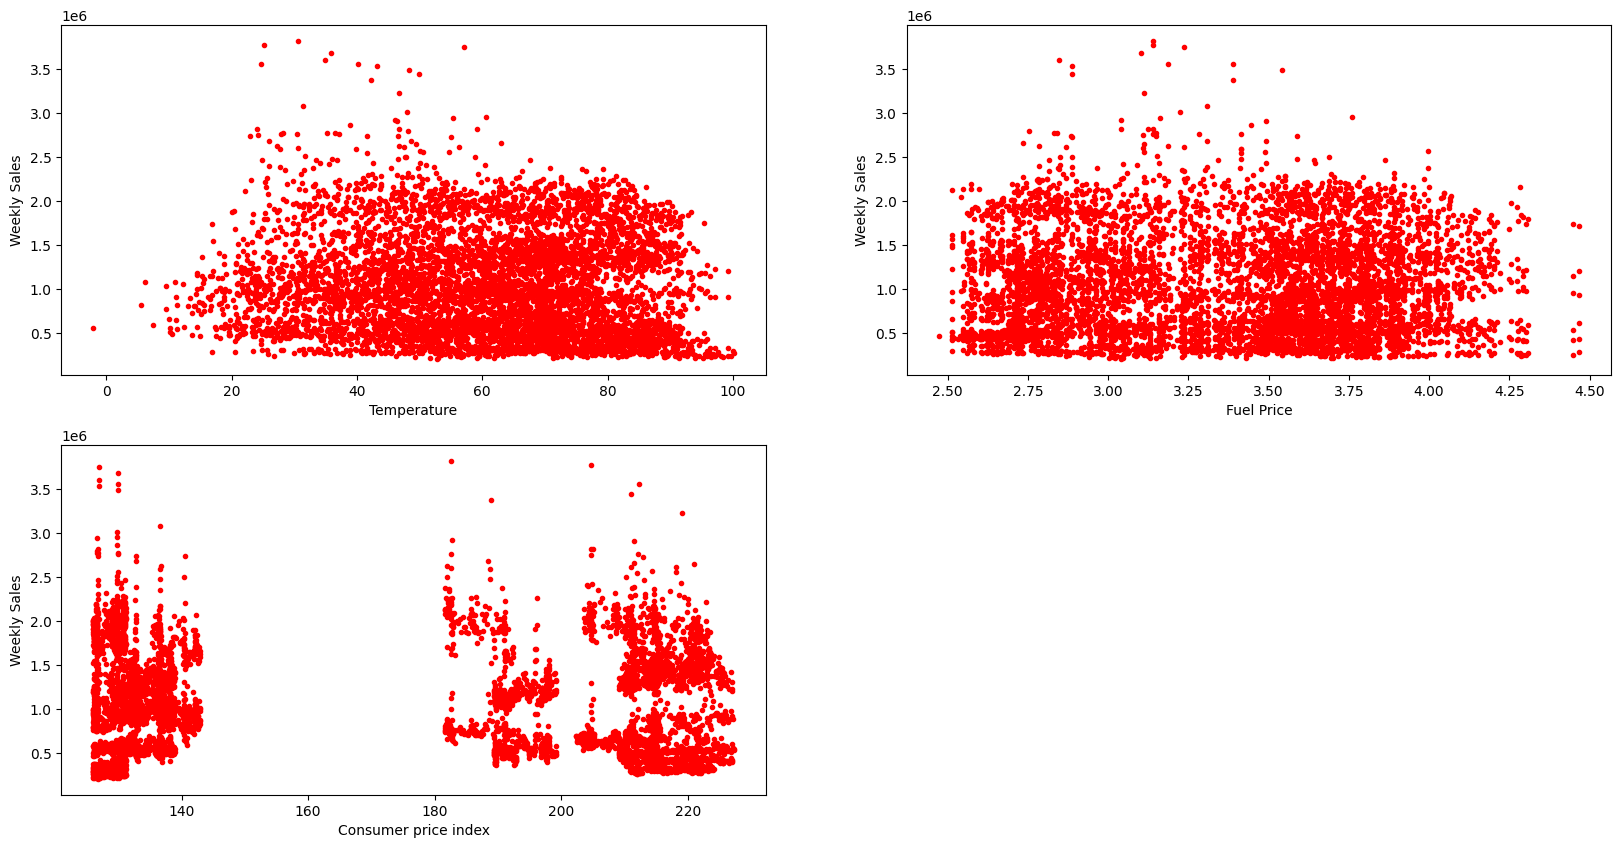

In [119]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter( 'Temperature', 'Weekly_Sales', data=df_walmart_sales, marker='.', color='red', linewidth=1)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")

plt.subplot(2, 2, 2)
plt.scatter( 'Fuel_Price', 'Weekly_Sales', data=df_walmart_sales, marker='.', color='red', linewidth=1)
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")

plt.subplot(2, 2, 3)
plt.scatter( 'CPI', 'Weekly_Sales', data=df_walmart_sales, marker='.', color='red', linewidth=1)
plt.xlabel("Consumer price index")
plt.ylabel("Weekly Sales")

plt.show()

MSE: 272327016160.40433
MAE: 430824.2490649244


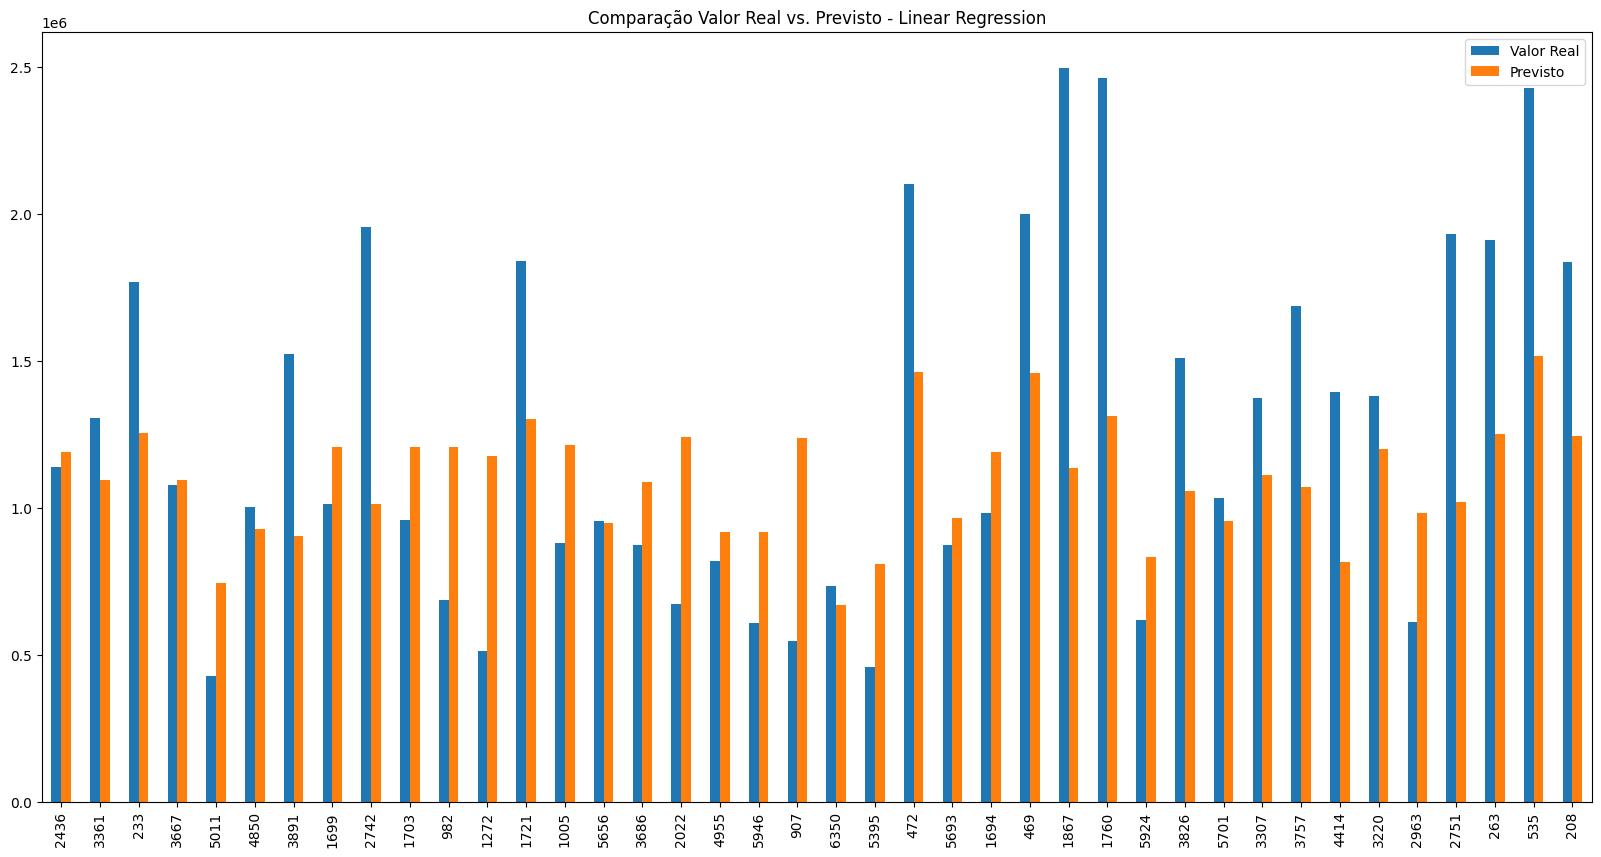

MSE: 95284889353.18181
MAE: 330655.48507509066


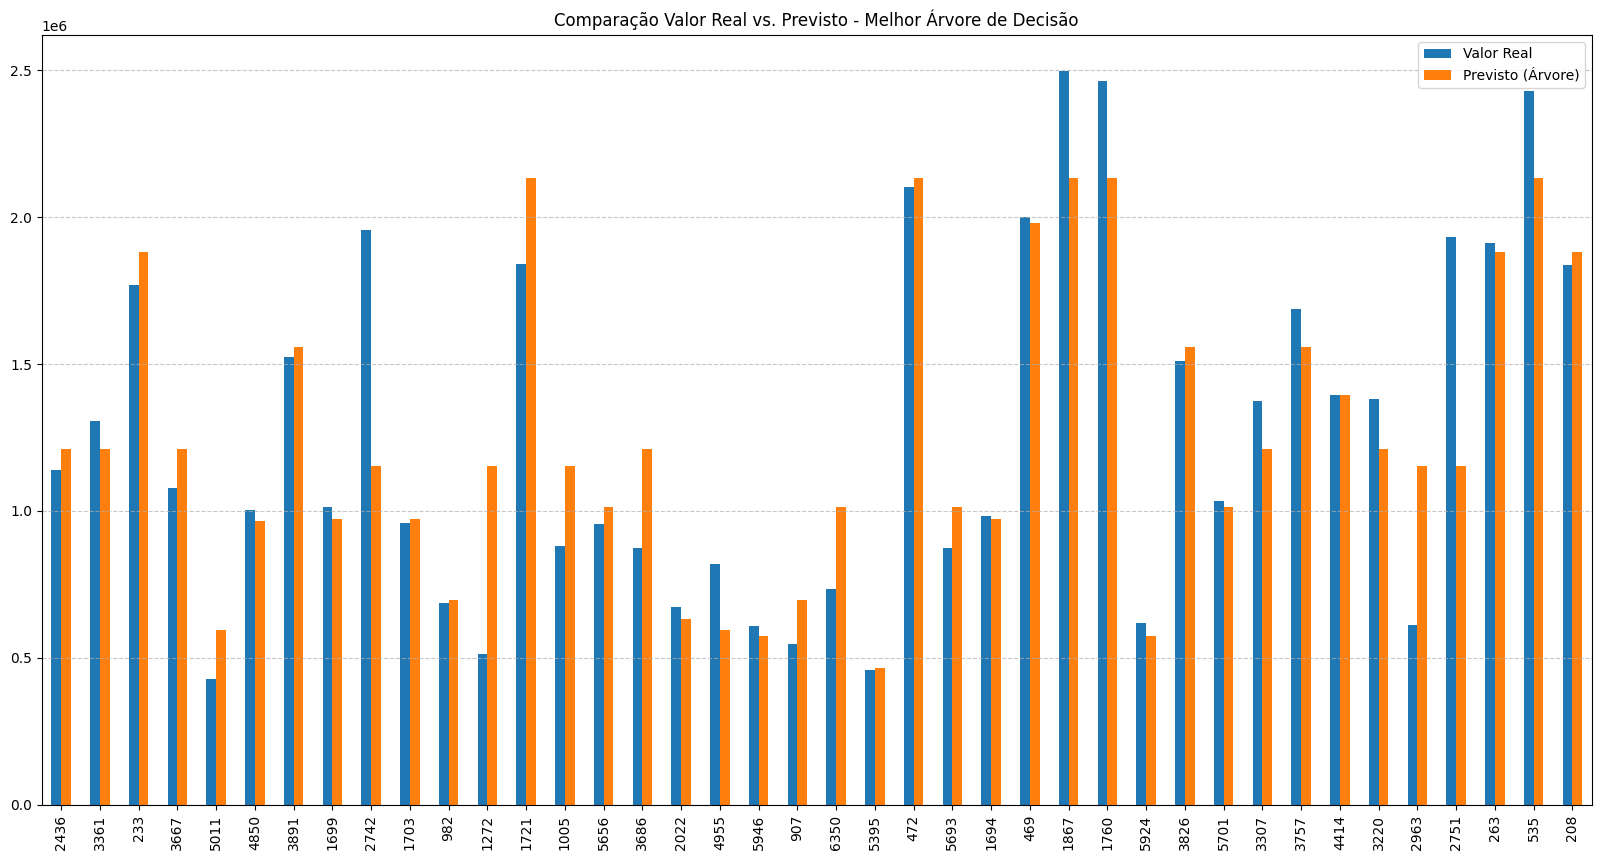

MSE: 77880736347.14694
MAE: 157958.7230631797


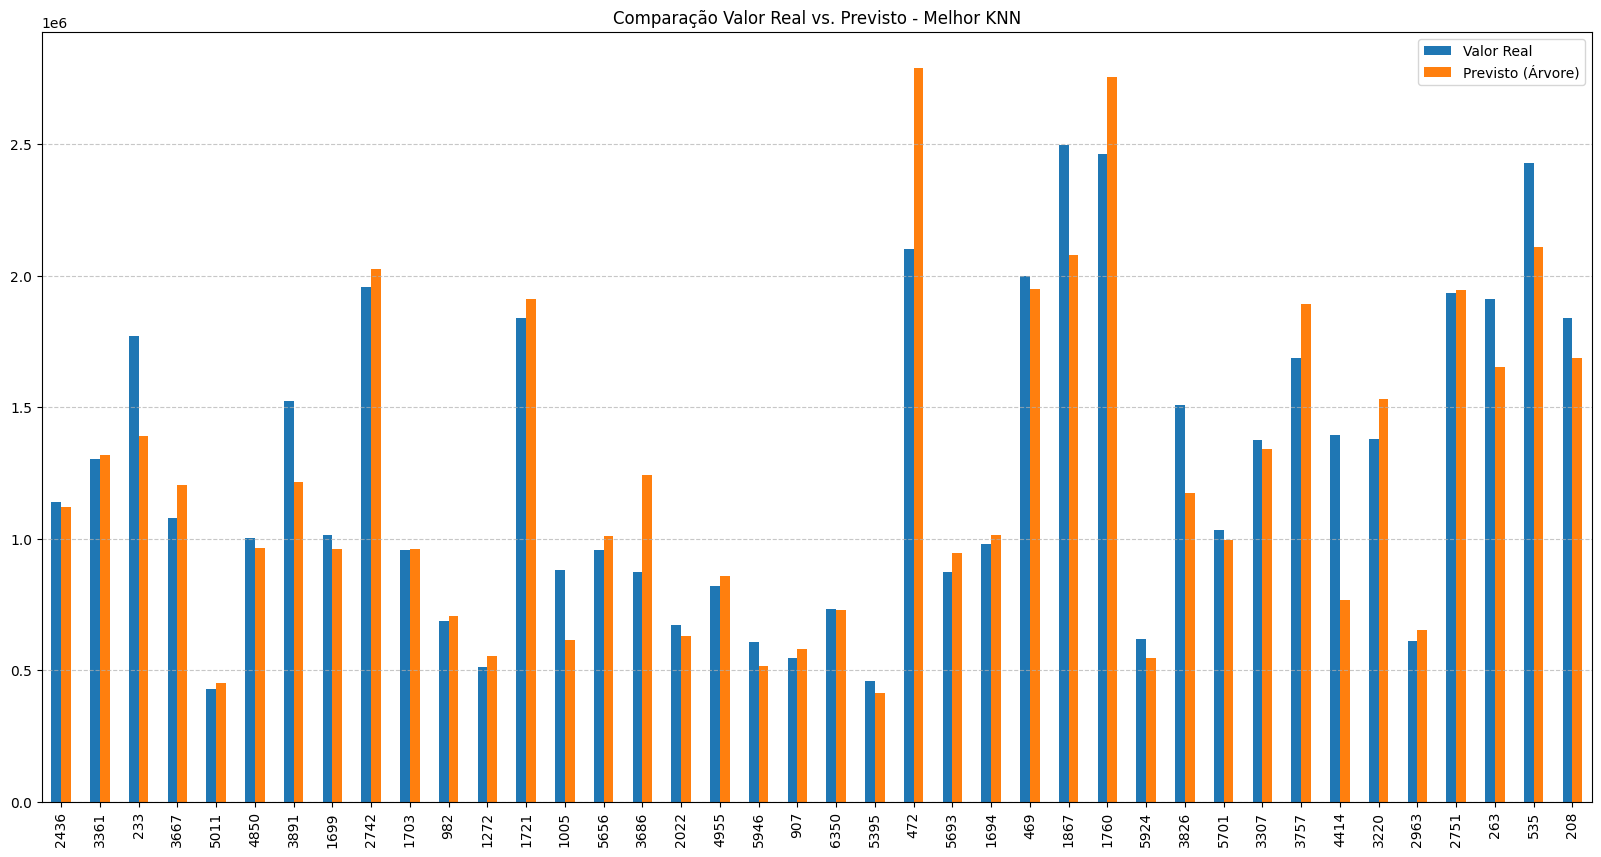

In [122]:
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(df_walmart_sales_norm.drop('Weekly_Sales', axis=1), df_walmart_sales['Weekly_Sales'], test_size=0.3, random_state=42)
linear_model_walmart_sales = LinearRegression()
linear_model_walmart_sales.fit(dados_treino, rotulos_treino)
linear_model_walmart_sales_predict = linear_model_walmart_sales.predict(dados_teste)
print("MSE:", MSE(rotulos_teste, linear_model_walmart_sales_predict))
print("MAE:", MAE(rotulos_teste, linear_model_walmart_sales_predict))
real_predict_df = pd.DataFrame({'Valor Real': rotulos_teste, 'Previsto': linear_model_walmart_sales_predict})
real_predict_df.iloc[0:40,:].plot(kind='bar',figsize=(20,10))
plt.title('Comparação Valor Real vs. Previsto - Linear Regression')
plt.show()

criterio = ["squared_error",'absolute_error']
splitter = ["best", "random"]
max_depth = [2,3, 5]
melhor_mse = np.inf
for c in criterio:
  for s in splitter:
    for m in max_depth:
      tree = DecisionTreeRegressor(criterion=c, splitter=s, max_depth=m)
      tree.fit(dados_treino, rotulos_treino)
      prev_train = tree.predict(dados_teste)
      mse_train = MSE(rotulos_teste, prev_train)
      mae_train = MAE(rotulos_teste, prev_train)
      if mse_train < melhor_mse:
        melhor_mse = mse_train
        melhor_modelo = tree
print("MSE:", melhor_mse)
print("MAE:", mae_train)

tree_predict_teste = melhor_modelo.predict(dados_teste)
tree_real_predict_df = pd.DataFrame({
    'Valor Real': rotulos_teste,
    'Previsto (Árvore)': tree_predict_teste
})
tree_real_predict_df.iloc[0:40,:].plot(kind='bar', figsize=(20, 10))
plt.title('Comparação Valor Real vs. Previsto - Melhor Árvore de Decisão')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade para facilitar a leitura
plt.show()

k_values = [10, 5, 3, 2]
metric = ['minkowski', 'euclidean']
melhor_mse = np.inf
for k in k_values:
  for m in metric:
    knn = KNeighborsRegressor(n_neighbors=k, metric=m)
    knn.fit(dados_treino, rotulos_treino)
    prev_train = knn.predict(dados_teste)
    mse_train = MSE(rotulos_teste, prev_train)
    mae_train = MAE(rotulos_teste, prev_train)
    if mse_train < melhor_mse:
      melhor_mse = mse_train
      melhor_modelo = knn
print("MSE:", melhor_mse)
print("MAE:", mae_train)
knn_predict_teste = melhor_modelo.predict(dados_teste)
knn_real_predict_df = pd.DataFrame({
    'Valor Real': rotulos_teste,
    'Previsto (Árvore)': knn_predict_teste
})
knn_real_predict_df.iloc[0:40,:].plot(kind='bar', figsize=(20, 10))
plt.title('Comparação Valor Real vs. Previsto - Melhor KNN')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade para facilitar a leitura
plt.show()